In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Task 1 - Image Reconstruction using Suitable Metrics

In [45]:
#Custom Function to view images better
def show_pic(img):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

(1024, 398, 3)

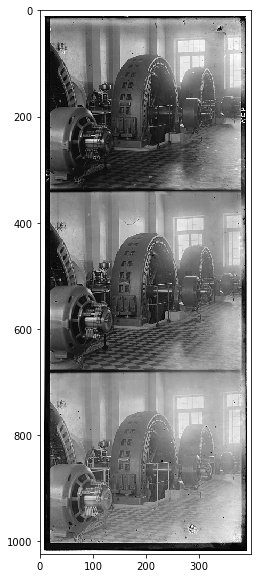

In [46]:
img = cv2.imread('s1.jpg',1)
show_pic(img)
img.shape

In [47]:
def crop_image(img):
    y_axis = img.shape[0]//3
    x_axis = img.shape[1]
    img1 = img[0:y_axis,0:x_axis]
    img2 = img[y_axis:y_axis*2,0:x_axis]
    img3 = img[y_axis*2:y_axis*3,0:x_axis]
    return img1,img2,img3

In [48]:
img11,img12,img13 = crop_image(img)

(341, 398, 3)

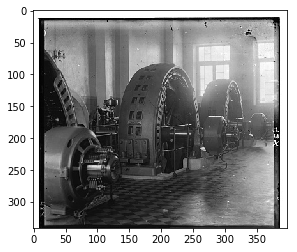

In [49]:
plt.imshow(img11)
img11.shape

In [50]:
def remove_borders(img1,img2,img3):
    #assuming borders are of 20 pixels on all sides
    #Cropping the image into three using array slicing in numpy
    x = img1[20:320,20:360]
    y = img2[20:320,20:360]
    z = img3[20:320,20:360]
    return x,y,z

In [51]:
#Resized and cropped images --->clean processed images
img11,img12,img13 = remove_borders(img11,img12,img13)

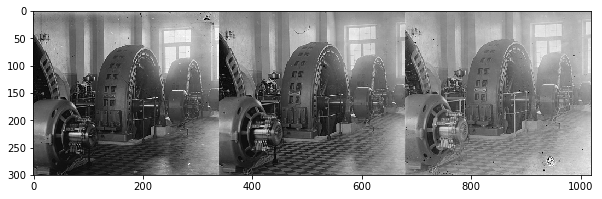

In [52]:
#Displaying the three images side by side
all = cv2.hconcat([img11,img12,img13])
show_pic(all)

In [53]:
#Checking if all three images are of the same dimensions to proceed with further processing.
print(f'The shape of the three images are {img11.shape},{img12.shape},{img13.shape}.')

The shape of the three images are (300, 340, 3),(300, 340, 3),(300, 340, 3).


In [54]:
#This function takes an image and splits it into three channels and returns the images (BGR)
def channel_splitting(img):
    #blue channel has dim = 0
    b = img[:,:,0]
    #green channel has dim = 1
    g = img[:,:,1]
    #red channel has dim = 2
    r = img[:,:,2]
    return b,g,r

In [55]:
#We obtain the relevant channels from the relavant images
#Blue channel of first image,Green channel of second image and Red channel of third image
blue1,_,_ = channel_splitting(img11)
_,green1,_ = channel_splitting(img12)
_,_,red1 = channel_splitting(img13)

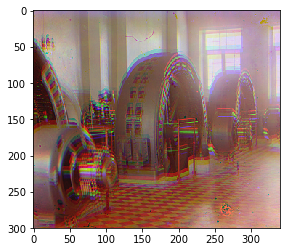

In [56]:
#The relevant channels are blue1,green1 and red1
test_merge = cv2.merge([red1,green1,blue1])
#Displaying the misalignment of channels
plt.imshow(test_merge)

In [57]:
#Implementing an algorithm to find error between offsets and store them to find the configuration with least error
#The metric used is SSD
#This function returns the sum of the differences squared of two numpy matrices
def ssd(A,B):
    result = ((A-B)**2).sum()
    return result

In [58]:
# search space is an algorithm to find error between offsets and store them to find the configuration with least error
#images are padded to get offsets from 0 to 20 and calculate error between base and template images
def search_space(base,img):
    config = {}
    height = int(base.shape[0])
    width = int(base.shape[1])
    ####### RIGHT SEARCH #############
    for i in range(20):
        temp_img = np.pad(img,[(0,0),(0,i)],constant_values = 0)
        temp_img = temp_img[:height,i:] #image size = 300 x 340 ------> change size
        #print(temp_img)
        error = ssd(base,temp_img)
        setting = 'R' + str(i)
        config[setting] = error
    ####### LEFT SEARCH #############
    for i in range(20):
        temp_img = np.pad(img,[(0,0),(i,0)],constant_values = 0)
        temp_img = temp_img[:height,:width] #image size = 300 x 340 ------> change size
        #print(temp_img)
        error = ssd(base,temp_img)
        setting = 'L' + str(i)
        config[setting] = error
    ####### BOTTOM SEARCH #############
    for i in range(20):
        temp_img = np.pad(img,[(0,i),(0,0)],constant_values = 0)
        temp_img = temp_img[i:,:width] #image size = 300 x 340 ------> change size
        #print(temp_img)
        error = ssd(base,temp_img)
        setting = 'B' + str(i)
        config[setting] = error
    ####### TOP SEARCH ################
    for i in range(20):
        temp_img = np.pad(img,[(i,0),(0,0)],constant_values = 0)
        temp_img = temp_img[:height,:width] #image size = 300 x 340 ------> change size
        #print(temp_img)
        error = ssd(base,temp_img)
        setting = 'A' + str(i)
        config[setting] = error
    return config

In [59]:
#Finding minimum offset error in channel
#Search Space returns a dictionary containing all offsets as keys and their respective error values 
def minimum_error(config):
    minimum = min(config, key=config.get)
    return minimum

In [60]:
red_config = search_space(green1,red1)
blue_config = search_space(green1,blue1)
red_min = minimum_error(red_config)
blue_min = minimum_error(blue_config)

In [61]:
for key,value in red_config.items():
    print(f'Configuration : {key} has an error of {value}.')
#Displaying the minimum offset
print(f'The minimum offset is {red_min}.')

Configuration : R0 has an error of 11180681.
Configuration : R1 has an error of 11090098.
Configuration : R2 has an error of 11037783.
Configuration : R3 has an error of 11018942.
Configuration : R4 has an error of 10963748.
Configuration : R5 has an error of 10971766.
Configuration : R6 has an error of 10992476.
Configuration : R7 has an error of 11017710.
Configuration : R8 has an error of 11030128.
Configuration : R9 has an error of 11036599.
Configuration : R10 has an error of 11043632.
Configuration : R11 has an error of 11093960.
Configuration : R12 has an error of 11090137.
Configuration : R13 has an error of 11079187.
Configuration : R14 has an error of 11073419.
Configuration : R15 has an error of 11068436.
Configuration : R16 has an error of 11049786.
Configuration : R17 has an error of 11027547.
Configuration : R18 has an error of 11032166.
Configuration : R19 has an error of 11005583.
Configuration : L0 has an error of 11180681.
Configuration : L1 has an error of 11188869.


In [62]:
for key,value in blue_config.items():
    print(f'Configuration : {key} has an error of {value}.')
#Displaying the minimum offset
print(f'The minimum offset is {blue_min}.')

Configuration : R0 has an error of 9314566.
Configuration : R1 has an error of 9211425.
Configuration : R2 has an error of 9219614.
Configuration : R3 has an error of 9271026.
Configuration : R4 has an error of 9354428.
Configuration : R5 has an error of 9386153.
Configuration : R6 has an error of 9512067.
Configuration : R7 has an error of 9509430.
Configuration : R8 has an error of 9526741.
Configuration : R9 has an error of 9641881.
Configuration : R10 has an error of 9715428.
Configuration : R11 has an error of 9730603.
Configuration : R12 has an error of 9786615.
Configuration : R13 has an error of 9797229.
Configuration : R14 has an error of 9884798.
Configuration : R15 has an error of 9928776.
Configuration : R16 has an error of 10030830.
Configuration : R17 has an error of 10124341.
Configuration : R18 has an error of 10141139.
Configuration : R19 has an error of 10194283.
Configuration : L0 has an error of 9314566.
Configuration : L1 has an error of 9477518.
Configuration : L2

In [63]:
#This function takes in the min offset from the search space function and creates the optimum offset
def create_optimum_offset(img,state):
    choice = state[0]
    pad_level = int(state[1:])
    if choice == 'A':
        new = np.pad(img,[(pad_level,0),(0,0)],constant_values = 0)
    if choice == 'B':
        new = np.pad(img,[(0,pad_level),(0,0)],constant_values = 0)
    if choice == 'L':
        new = np.pad(img,[(0,0),(pad_level,0)],constant_values = 0)
    if choice == 'R':
        new = np.pad(img,[(0,0),(0,pad_level)],constant_values = 0)
    return new

(318, 340)

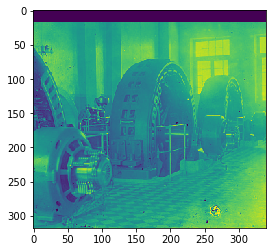

In [64]:
red1_offset = create_optimum_offset(red1,red_min)
plt.imshow(red1_offset)
red1_offset.shape

(305, 340)

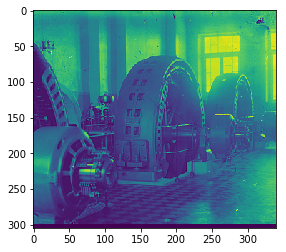

In [65]:
blue1_offset = create_optimum_offset(blue1,blue_min)
plt.imshow(blue1_offset)
blue1_offset.shape

In [66]:
#Cropping the image area with padding to get the required shape as the template for merging
red1_offset = red1_offset[18:,0:]
blue1_offset = blue1_offset[:300,0:]

(300, 340)

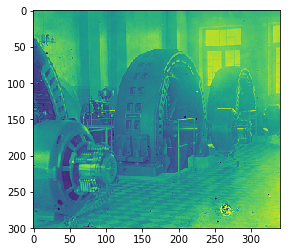

In [67]:
plt.imshow(red1_offset)
red1_offset.shape

(300, 340)

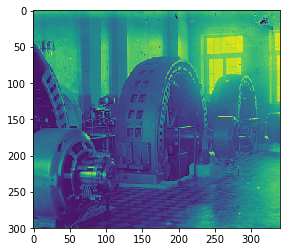

In [68]:
plt.imshow(blue1_offset)
blue1_offset.shape

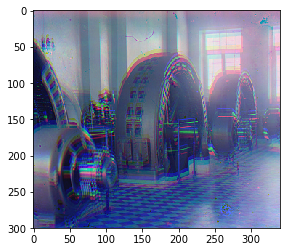

In [69]:
output1 = cv2.merge([blue1_offset,green1,red1_offset])
plt.imshow(output1)

In [70]:
cv2.imwrite('Task1Output1.jpg',output1)

True

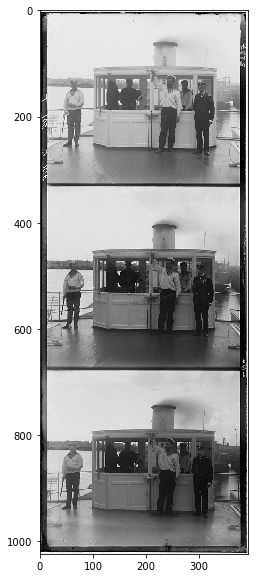

In [71]:
img2 = cv2.imread('s5.jpg',1)
show_pic(img2)

In [72]:
img21,img22,img23 = crop_image(img2)

(300, 340, 3)

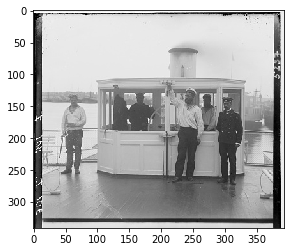

In [73]:
plt.imshow(img21)
img11.shape

In [74]:
#Resized and cropped images --->clean processed images
img21,img22,img23 = remove_borders(img21,img22,img23)

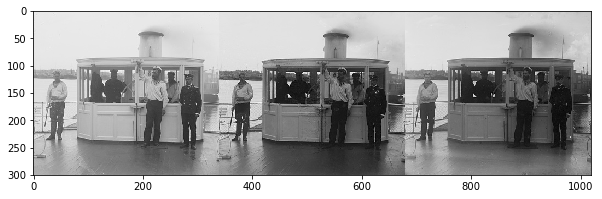

In [75]:
#Displaying the three images side by side
all = cv2.hconcat([img21,img22,img23])
show_pic(all)

In [76]:
#Checking if all three images are of the same dimensions to proceed with further processing.
print(f'The shape of the three images are {img11.shape},{img12.shape},{img13.shape}.')

The shape of the three images are (300, 340, 3),(300, 340, 3),(300, 340, 3).


In [77]:
#We obtain the relevant channels from the relavant images
#Blue channel of first image,Green channel of second image and Red channel of third image
blue2,_,_ = channel_splitting(img21)
_,green2,_ = channel_splitting(img22)
_,_,red2 = channel_splitting(img23)

In [78]:
red2_config = search_space(green2,red2)
blue2_config = search_space(green2,blue2)
red2_min = minimum_error(red2_config)
blue2_min = minimum_error(blue2_config)

In [79]:
for key,value in red2_config.items():
    print(f'Configuration : {key} has an error of {value}.')
#Displaying the minimum offset
print(f'The minimum offset is {red2_min}.')

Configuration : R0 has an error of 8372009.
Configuration : R1 has an error of 8492631.
Configuration : R2 has an error of 8587943.
Configuration : R3 has an error of 8682694.
Configuration : R4 has an error of 8734275.
Configuration : R5 has an error of 8799565.
Configuration : R6 has an error of 8853950.
Configuration : R7 has an error of 8875932.
Configuration : R8 has an error of 8950880.
Configuration : R9 has an error of 9011062.
Configuration : R10 has an error of 9055247.
Configuration : R11 has an error of 9092310.
Configuration : R12 has an error of 9117387.
Configuration : R13 has an error of 9186469.
Configuration : R14 has an error of 9220601.
Configuration : R15 has an error of 9271948.
Configuration : R16 has an error of 9269865.
Configuration : R17 has an error of 9307793.
Configuration : R18 has an error of 9361557.
Configuration : R19 has an error of 9382144.
Configuration : L0 has an error of 8372009.
Configuration : L1 has an error of 8297315.
Configuration : L2 has

In [80]:
for key,value in blue2_config.items():
    print(f'Configuration : {key} has an error of {value}.')
#Displaying the minimum offset
print(f'The minimum offset is {blue2_min}.')

Configuration : R0 has an error of 10137833.
Configuration : R1 has an error of 10120267.
Configuration : R2 has an error of 10064213.
Configuration : R3 has an error of 10134621.
Configuration : R4 has an error of 10106405.
Configuration : R5 has an error of 10154112.
Configuration : R6 has an error of 10153760.
Configuration : R7 has an error of 10185127.
Configuration : R8 has an error of 10175329.
Configuration : R9 has an error of 10174130.
Configuration : R10 has an error of 10113685.
Configuration : R11 has an error of 10079476.
Configuration : R12 has an error of 10090280.
Configuration : R13 has an error of 10068531.
Configuration : R14 has an error of 10095287.
Configuration : R15 has an error of 9985933.
Configuration : R16 has an error of 10008221.
Configuration : R17 has an error of 9991721.
Configuration : R18 has an error of 9981224.
Configuration : R19 has an error of 9960724.
Configuration : L0 has an error of 10137833.
Configuration : L1 has an error of 10077421.
Conf

(300, 341)

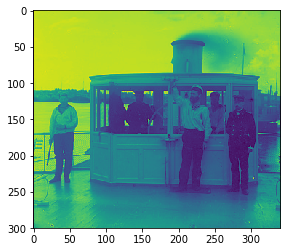

In [81]:
red2_offset = create_optimum_offset(red2,red2_min)
plt.imshow(red2_offset)
red2_offset.shape

(318, 340)

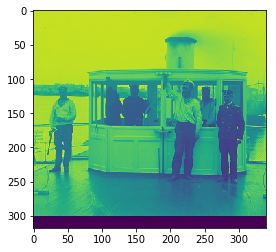

In [82]:
blue2_offset = create_optimum_offset(blue2,blue2_min)
plt.imshow(blue2_offset)
blue2_offset.shape

In [83]:
#Cropping the image area with padding to get the required shape as the template for merging
red2_offset = red2_offset[0:,:340]
blue2_offset = blue2_offset[:300,0:]

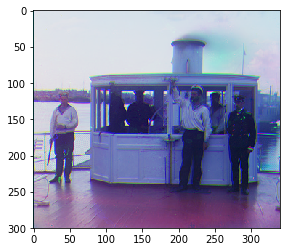

In [84]:
output2 = cv2.merge([red2_offset,green2,blue2_offset])
plt.imshow(output2)

In [85]:
output2 = cv2.cvtColor(output2,cv2.COLOR_BGR2RGB)
cv2.imwrite('Task1Output2.jpg',output2)

True

Task 2 - Image Pyramid to implement SSD for High Resolution Images

(4664, 1800, 3)

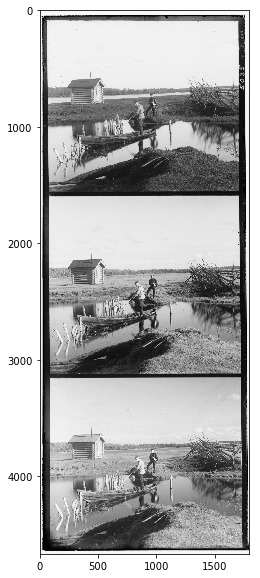

In [86]:
img3 = cv2.imread('00911u.jpg')
show_pic(img3)
img3.shape

In [87]:
img31,img32,img33 = crop_image(img3)

In [88]:
def remove_border(image):
    image = image[54:1554,100:1750]
    return image

In [89]:
img31 = remove_border(img31)
img32 = remove_border(img32)
img33 = remove_border(img33)

In [90]:
b3,_,_ = channel_splitting(img31)
_,g3,_ = channel_splitting(img32)
_,_,r3 = channel_splitting(img33)

(1500, 1650)

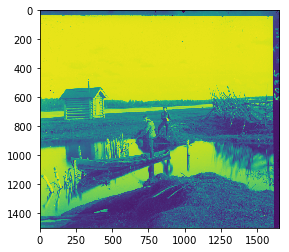

In [91]:
plt.imshow(b3)
b3.shape

In [92]:
resolutions = []

In [93]:
#Function to Iteratively Downsize
resolutions = []
def downsize_image(base_image,count,breakpoint):
    resolutions.append(base_image)
    if count!=breakpoint:
        count += 1
        down_image = cv2.resize(base_image,None,fx=0.5,fy=0.5)
        #resolutions.append(down_image)
        return downsize_image(down_image,count,breakpoint)
    else:
        return base_image

In [94]:
count = 0
breakpoint = 2
base_image = r3.copy()
red_small = downsize_image(base_image,count,breakpoint)

In [95]:
base_image = b3.copy()
blue_small = downsize_image(base_image,count,breakpoint)

In [96]:
base_image = g3.copy()
green_small = downsize_image(base_image,count,breakpoint)

In [97]:
len(resolutions)

9

In [98]:
blue_small.shape

(375, 412)

In [99]:
#Repeating task1 for smallest resolution of each channel
red3_config = search_space(green_small,red_small)
blue3_config = search_space(green_small,blue_small)
red3_min = minimum_error(red3_config)
blue3_min = minimum_error(blue3_config)

In [100]:
red3_min

'A14'

In [101]:
blue3_min

'B2'

In [102]:
#The list resolutions have a copy of all the sizes of all the three channels
#After searching the smallest resolution we search in the next smallest resolution
def optimum_search_space(base,img,search_area):
    config = {}
    height = int(base.shape[0])
    width = int(base.shape[1])
    ####### RIGHT SEARCH #############
    if search_area == 'R':
        for i in range(20):
            height = int(base.shape[0])
            width = int(base.shape[1])
            temp_img = np.pad(img,[(0,0),(0,i)],constant_values = 0)
            temp_img = temp_img[:height,i:] #image size = 300 x 340 ------> change size
            #print(temp_img)
            error = ssd(base,temp_img)
            setting = 'R' + str(i)
            config[setting] = error
    ####### LEFT SEARCH #############
    if search_area == 'L':
        for i in range(20):
            temp_img = np.pad(img,[(0,0),(i,0)],constant_values = 0)
            temp_img = temp_img[:height,:width] #image size = 300 x 340 ------> change size
            #print(temp_img)
            error = ssd(base,temp_img)
            setting = 'L' + str(i)
            config[setting] = error
    ####### BOTTOM SEARCH #############
    if search_area == 'B':
        for i in range(20):
            temp_img = np.pad(img,[(0,i),(0,0)],constant_values = 0)
            temp_img = temp_img[i:,:width] #image size = 300 x 340 ------> change size
            #print(temp_img)
            error = ssd(base,temp_img)
            setting = 'B' + str(i)
            config[setting] = error
    ####### TOP SEARCH ################
    if search_area == 'A':
        for i in range(20):
            temp_img = np.pad(img,[(i,0),(0,0)],constant_values = 0)
            temp_img = temp_img[:height,:width] #image size = 300 x 340 ------> change size
            #print(temp_img)
            error = ssd(base,temp_img)
            setting = 'A' + str(i)
            config[setting] = error
    return config

In [103]:
# 0,1,2 - Red
# 3,4,5 - Blue
# 6,7,8 - Green
print(f'Largest Resolution : {resolutions[0].shape}')
print(f'Medium Resolution : {resolutions[1].shape}')
print(f'Smallest Resolution : {resolutions[2].shape}')

Largest Resolution : (1500, 1650)
Medium Resolution : (750, 825)
Smallest Resolution : (375, 412)


In [104]:
r3_medium = resolutions[1]
b3_medium = resolutions[4]
g3_medium = resolutions[7]
g3_medium.shape

(750, 825)

In [105]:
#Repeating task1 for medium resolution of each channel
red3_config = optimum_search_space(g3_medium,r3_medium,'A')
blue3_config = optimum_search_space(g3_medium,b3_medium,'B')
red3_min = minimum_error(red3_config)
blue3_min = minimum_error(blue3_config)

In [106]:
red3_min

'A19'

In [107]:
blue3_min

'B3'

In [108]:
r3_large = resolutions[0]
b3_large = resolutions[3]
g3_large = resolutions[6]

In [109]:
#Repeating task1 for large resolution of each channel
red3_config = optimum_search_space(g3_large,r3_large,'A')
blue3_config = optimum_search_space(g3_large,b3_large,'B')
red3_min = minimum_error(red3_config)
blue3_min = minimum_error(blue3_config)

In [110]:
red3_min

'A18'

In [111]:
blue3_min

'B6'

In [112]:
red3_offset = create_optimum_offset(r3_large,red3_min)
blue3_offset = create_optimum_offset(b3_large,blue3_min)

(1518, 1650)

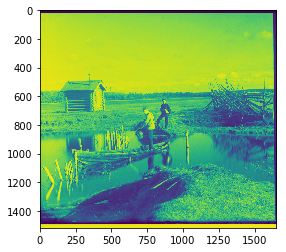

In [113]:
plt.imshow(red3_offset)
red3_offset.shape

In [114]:
#Cropping the image to align 
red3_offset = red3_offset[0:1500,:]

(1506, 1650)

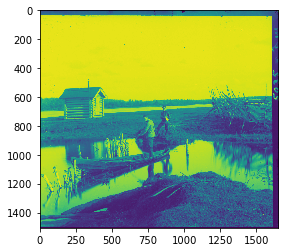

In [115]:
plt.imshow(blue3_offset)
blue3_offset.shape

In [116]:
#Cropping the image to align 
blue3_offset = blue3_offset[0:1500,:]

(1500, 1650)

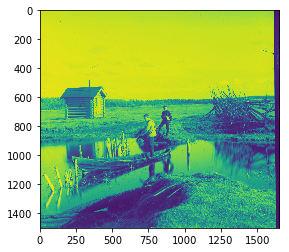

In [117]:
plt.imshow(g3_large)
g3_large.shape

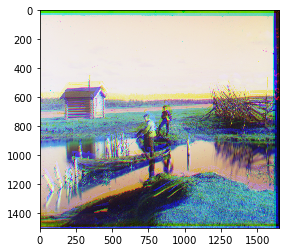

In [118]:
r3_output = cv2.merge([blue3_offset,g3_large,red3_offset])
plt.imshow(r3_output)

In [119]:
r3_output = cv2.cvtColor(r3_output,cv2.COLOR_RGB2BGR)
cv2.imwrite('Task2Output1.jpg',r3_output)

True

(4646, 1800, 3)

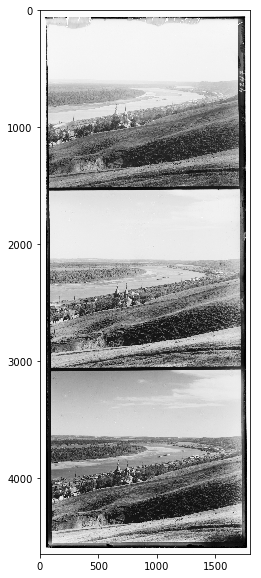

In [120]:
img4 = cv2.imread('00549u.jpg')
show_pic(img4)
img4.shape

In [121]:
img41,img42,img43 = crop_image(img4)

In [122]:
img41.shape

(1548, 1800, 3)

In [123]:
def remove_border(image):
    image = image[48:1548,100:1700]
    return image

In [124]:
img41 = remove_border(img41)
img42 = remove_border(img42)
img43 = remove_border(img43)

(1500, 1600, 3)

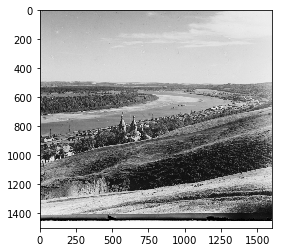

In [125]:
plt.imshow(img43)
img41.shape

In [126]:
b4,_,_ = channel_splitting(img41)
_,g4,_ = channel_splitting(img42)
_,_,r4 = channel_splitting(img43)

In [127]:
#Function to Iteratively Downsize
resolutions = []
def downsize_image(base_image,count,breakpoint):
    resolutions.append(base_image)
    if count!=breakpoint:
        count += 1
        down_image = cv2.resize(base_image,None,fx=0.5,fy=0.5)
        #resolutions.append(down_image)
        return downsize_image(down_image,count,breakpoint)
    else:
        return base_image

In [128]:
base_image = r4.copy()
red_small = downsize_image(base_image,count,breakpoint)

In [129]:
base_image = g4.copy()
green_small = downsize_image(base_image,count,breakpoint)

In [130]:
base_image = b4.copy()
blue_small = downsize_image(base_image,count,breakpoint)

In [131]:
len(resolutions)

9

In [132]:
#Repeating task1 for smallest resolution of each channel
red4_config = search_space(green_small,red_small)
blue4_config = search_space(green_small,blue_small)
red4_min = minimum_error(red3_config)
blue4_min = minimum_error(blue3_config)

In [133]:
red4_min

'A18'

In [134]:
blue4_min

'B6'

In [135]:
# 0,1,2 - Red
# 3,4,5 - Blue
# 6,7,8 - Green
print(f'Largest Resolution : {resolutions[0].shape}')
print(f'Medium Resolution : {resolutions[1].shape}')
print(f'Smallest Resolution : {resolutions[2].shape}')

Largest Resolution : (1500, 1600)
Medium Resolution : (750, 800)
Smallest Resolution : (375, 400)


In [136]:
r4_medium = resolutions[1]
b4_medium = resolutions[4]
g4_medium = resolutions[7]
g4_medium.shape

(750, 800)

In [137]:
#Repeating task1 for medium resolution of each channel
red4_config = optimum_search_space(g4_medium,r4_medium,'A')
blue4_config = optimum_search_space(g4_medium,b4_medium,'B')
red4_min = minimum_error(red4_config)
blue4_min = minimum_error(blue4_config)

In [138]:
red4_min

'A10'

In [139]:
blue4_min

'B0'

In [140]:
r4_large = resolutions[0]
b4_large = resolutions[3]
g4_large = resolutions[6]

In [141]:
#Repeating task1 for large resolution of each channel
red4_config = optimum_search_space(g4_large,r4_large,'A')
blue4_config = optimum_search_space(g4_large,b4_large,'B')
red4_min = minimum_error(red4_config)
blue4_min = minimum_error(blue4_config)

In [142]:
red4_min

'A15'

In [143]:
blue4_min

'B0'

In [144]:
red4_offset = create_optimum_offset(r4_large,red4_min)
blue4_offset = create_optimum_offset(b4_large,blue4_min)

(1515, 1600)

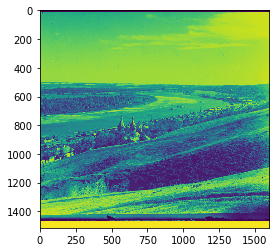

In [145]:
plt.imshow(red4_offset)
red4_offset.shape

In [146]:
red4_offset = red4_offset[:1400,:1600]

(1400, 1600)

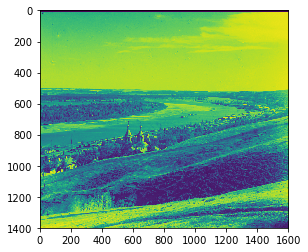

In [147]:
plt.imshow(red4_offset)
red4_offset.shape

(1500, 1600)

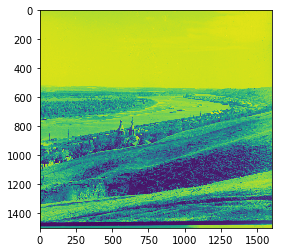

In [148]:
plt.imshow(blue4_offset)
blue4_offset.shape

In [149]:
blue4_offset = blue4_offset[:1400,:1600]

(1400, 1600)

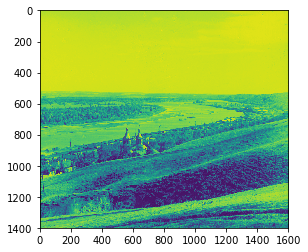

In [150]:
plt.imshow(blue4_offset)
blue4_offset.shape

(1500, 1600)

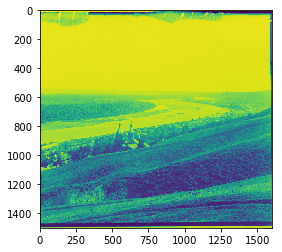

In [151]:
plt.imshow(g4_large)
g4_large.shape

In [152]:
g4_large = g4_large[:1400,:1600]

(1400, 1600)

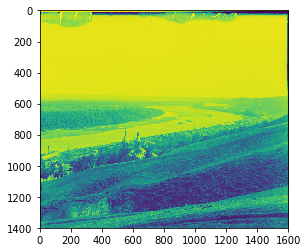

In [153]:
plt.imshow(g4_large)
g4_large.shape

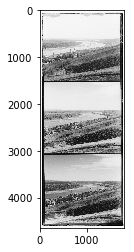

In [154]:
img4_output = cv2.merge([red4_offset,blue4_offset,g4_large])
plt.imshow(img4)

In [155]:
img4_output = cv2.cvtColor(img4_output,cv2.COLOR_RGB2BGR)
cv2.imwrite('Task2Output2.jpg',img4_output)

True